<a href="https://colab.research.google.com/github/Tanjib-Rafi/Spam-SMS-Detection/blob/main/SpamSmsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [333]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [334]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [335]:
dataset = pd.read_csv('/content/drive/MyDrive/datasets/SPAMtextmessage.csv',encoding="ISO-8859-1")

In [336]:
dataset

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [337]:
dataset.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

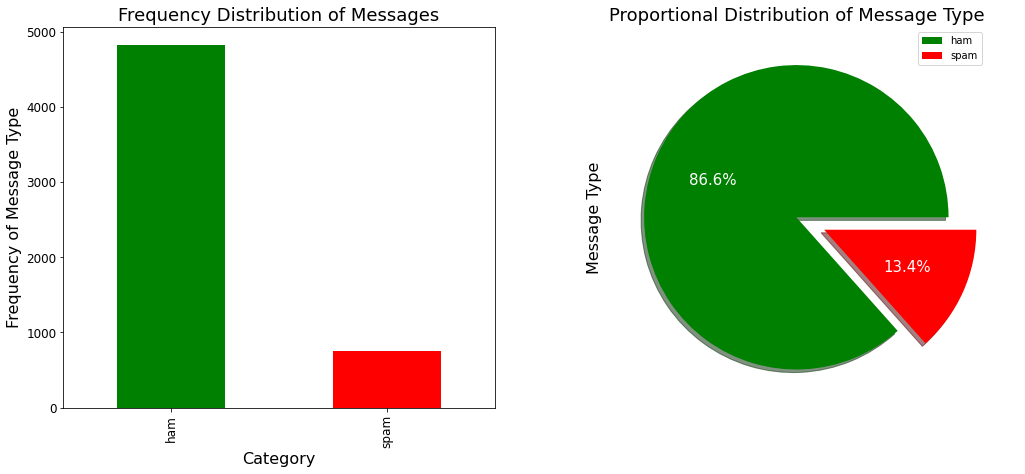

In [338]:
plt.figure(figsize=(17, 7))

plt.subplot(1, 2, 1)

dataset.Category.value_counts().plot(kind = 'bar', color = ['green', 'red'])

plt.xlabel('Category', fontsize=16)
plt.ylabel('Frequency of Message Type', fontsize=16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title('Frequency Distribution of Messages', fontsize=18)


plt.subplot(1,2,2)

dataset.Category.value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True, colors = ['green','red'],
                                  textprops={'fontsize':15, 'color':'white'})
plt.ylabel('Message Type', fontsize=16)
plt.title('Proportional Distribution of Message Type', fontsize=18)
plt.legend()

In [339]:
dataset['Category'] = dataset['Category'].replace(['ham','spam'],[0,1])
dataset.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [340]:
X=dataset.Message.values
y=dataset.Category.values

In [341]:
X

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [342]:
dataset['Category'].value_counts()

0    4825
1     747
Name: Category, dtype: int64

In [343]:
# dataset.drop_duplicates(inplace=True)

In [344]:
dataset['Category'].value_counts()

0    4825
1     747
Name: Category, dtype: int64

In [345]:
dataset

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ã¼ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [346]:
y.shape

(5572,)

In [347]:
x_data = []
y_data = []
count=0
j=0
while j<(len(dataset.values[:,0])):
  if dataset.values[j,0] == 1:
    y_data.append(1)
    x_data.append(dataset.values[j,1])
  if dataset.values[j,0] == 0:
    if count<747:
      y_data.append(0)
      x_data.append(dataset.values[j,1])
      count+=1
  j+=1

In [348]:
print(y_data.count(0))
print(y_data.count(1))
y = np.array(y_data)
X = np.array(x_data)

747
747


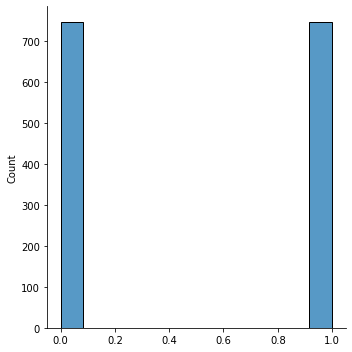

In [377]:
sns.displot(y)   

In [350]:
len(X)

1494

In [351]:
# from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

sw = stopwords.words("english")
cv = CountVectorizer(stop_words=sw)
X_data= cv.fit_transform(X).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [352]:
X_data.shape

(1494, 4419)

In [353]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size = 0.33, random_state=42)

In [354]:
X_train.shape

(1000, 4419)

In [355]:
X_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [356]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [357]:
model = Sequential()
model.add(Dense(128, input_dim=4419, activation='relu',name='input_layer'))
model.add(Dense(64,  activation='relu',name='hidden_layer_1'))
model.add(Dense(1, activation='sigmoid', name='output_layer'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [358]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 128)               565760    
                                                                 
 hidden_layer_1 (Dense)      (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 574,081
Trainable params: 574,081
Non-trainable params: 0
_________________________________________________________________


In [359]:
X_train.shape

(1000, 4419)

In [360]:
history = model.fit(X_train, y_train, epochs = 7,batch_size=64)

Epoch 1/7
16/16 [==============================] - 1s 9ms/step - loss: 0.6362 - accuracy: 0.7360
Epoch 2/7
16/16 [==============================] - 0s 8ms/step - loss: 0.4027 - accuracy: 0.9490
Epoch 3/7
16/16 [==============================] - 0s 10ms/step - loss: 0.1948 - accuracy: 0.9800
Epoch 4/7
16/16 [==============================] - 0s 9ms/step - loss: 0.0780 - accuracy: 0.9920
Epoch 5/7
16/16 [==============================] - 0s 9ms/step - loss: 0.0311 - accuracy: 0.9950
Epoch 6/7
16/16 [==============================] - 0s 12ms/step - loss: 0.0163 - accuracy: 0.9970
Epoch 7/7
16/16 [==============================] - 0s 10ms/step - loss: 0.0103 - accuracy: 0.9990


In [361]:
acd = history.history['accuracy']
loss = history.history['loss']

In [362]:
sms=['you win an iphone fillup the survey', #1
        'you are good', #0
        'you have been selected to receive a prize .You  have 24 hours to claim it', #1 
        "Hi Kim, Please let me know if you need any further information. Thanks", #0
        'we have detected fraudulent activity in your account.Please contact us for further information', #1
        'Free money!!!', #1
]

In [363]:
c = cv.transform(sms)
d=model.predict(c)
for i in range(len(d)):
  if d[i]>0.1:
    print('1')
  else:
    print('0')
# print(np.round(d))
# print(d)

1
0
1
0
1
1


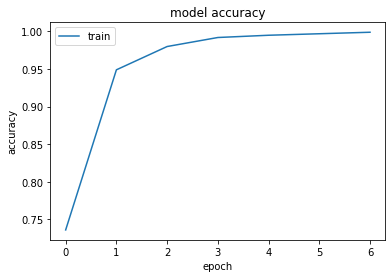

<Figure size 432x288 with 0 Axes>

In [364]:
plt.plot(acd)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()
plt.savefig('accuracy_curve.png')

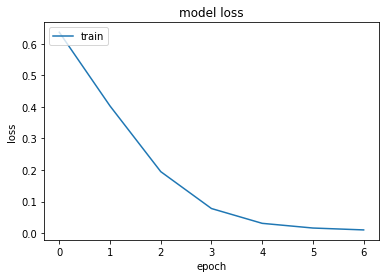

<Figure size 432x288 with 0 Axes>

In [365]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()
plt.savefig('loss_curve.png')

In [366]:
history_test = model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 4ms/step - loss: 0.1409 - accuracy: 0.9474


In [367]:
history_test

[0.1409032791852951, 0.9473684430122375]